# Number of Orders Prediction

https://thecleverprogrammer.com/2021/09/27/number-of-orders-prediction-with-machine-learning/

Predicting the number of orders for a product is one of the strategies a business can follow in determining how much to invest in marketing their product. So, predicting the number of orders is an important data science use case for product-based companies.

## Number of Orders Prediction

If you want to predict the number of orders a company may receive for a particular product, then you need to have historical data about the number of orders received by the company.

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/supplement.csv")
data.tail()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
188335,T1188336,149,S2,L3,R2,2019-05-31,1,Yes,51,37272.00
188336,T1188337,153,S4,L2,R1,2019-05-31,1,No,90,54572.64
188337,T1188338,154,S1,L3,R2,2019-05-31,1,No,56,31624.56
188338,T1188339,155,S3,L1,R2,2019-05-31,1,Yes,70,49162.41
188339,T1188340,152,S2,L1,R1,2019-05-31,1,No,47,37977.00


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [4]:
data.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64

In [5]:
data.describe()

,Store_id,Holiday,#Order,Sales
count,188340.000000,188340.000000,188340.000000,188340.000000
mean,183.000000,0.131783,68.205692,42784.327982
std,105.366308,0.338256,30.467415,18456.708302
min,1.000000,0.000000,0.000000,0.000000
25%,92.000000,0.000000,48.000000,30426.000000
50%,183.000000,0.000000,63.000000,39678.000000
75%,274.000000,0.000000,82.000000,51909.000000
max,365.000000,1.000000,371.000000,247215.000000


In [10]:
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

%matplotlib inline

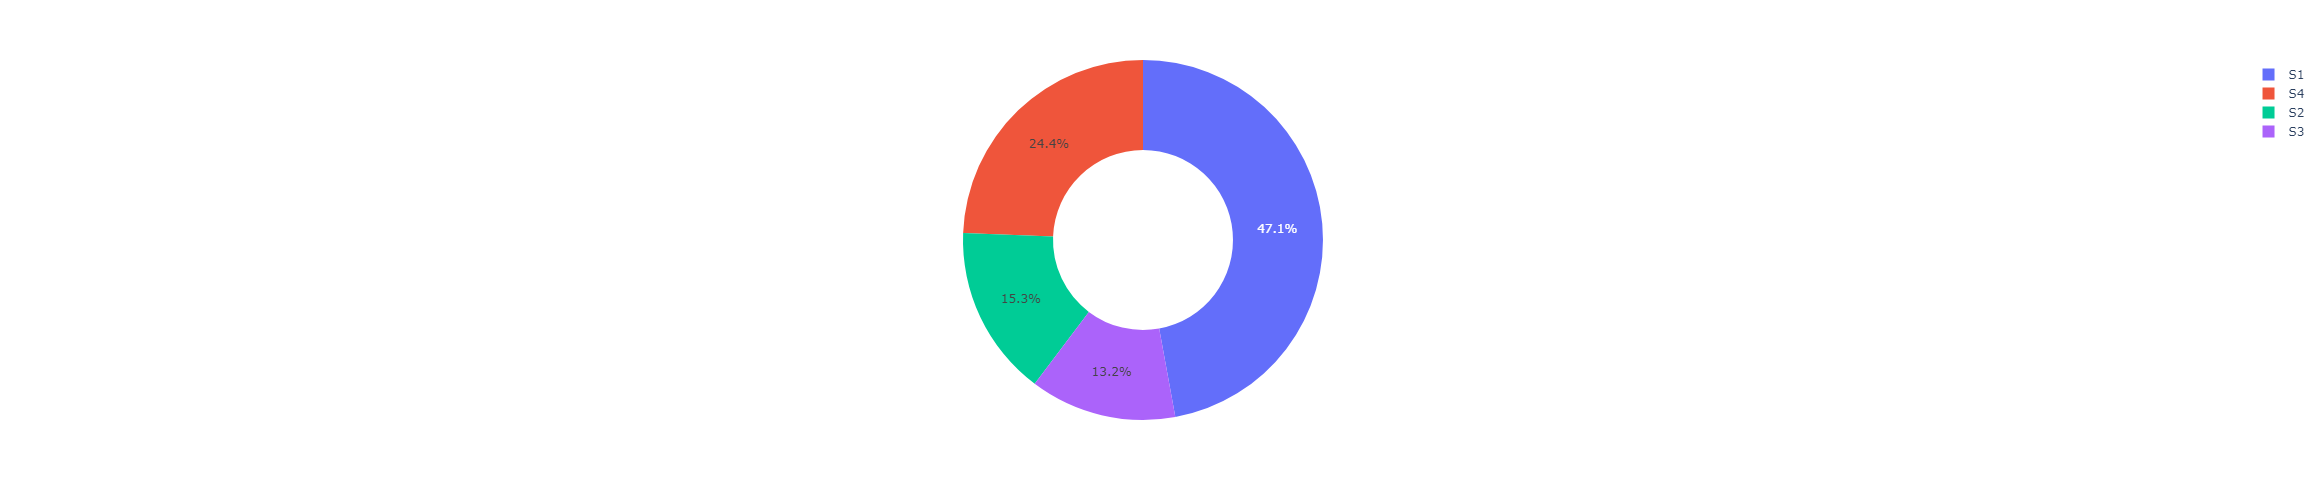

In [11]:
pie = data.Store_Type.value_counts()

fig = px.pie(data_frame=pie, 
             values=pie.values, 
             names=pie.index,
             hole=0.5,
             width=500,
             height=500)
fig.show()

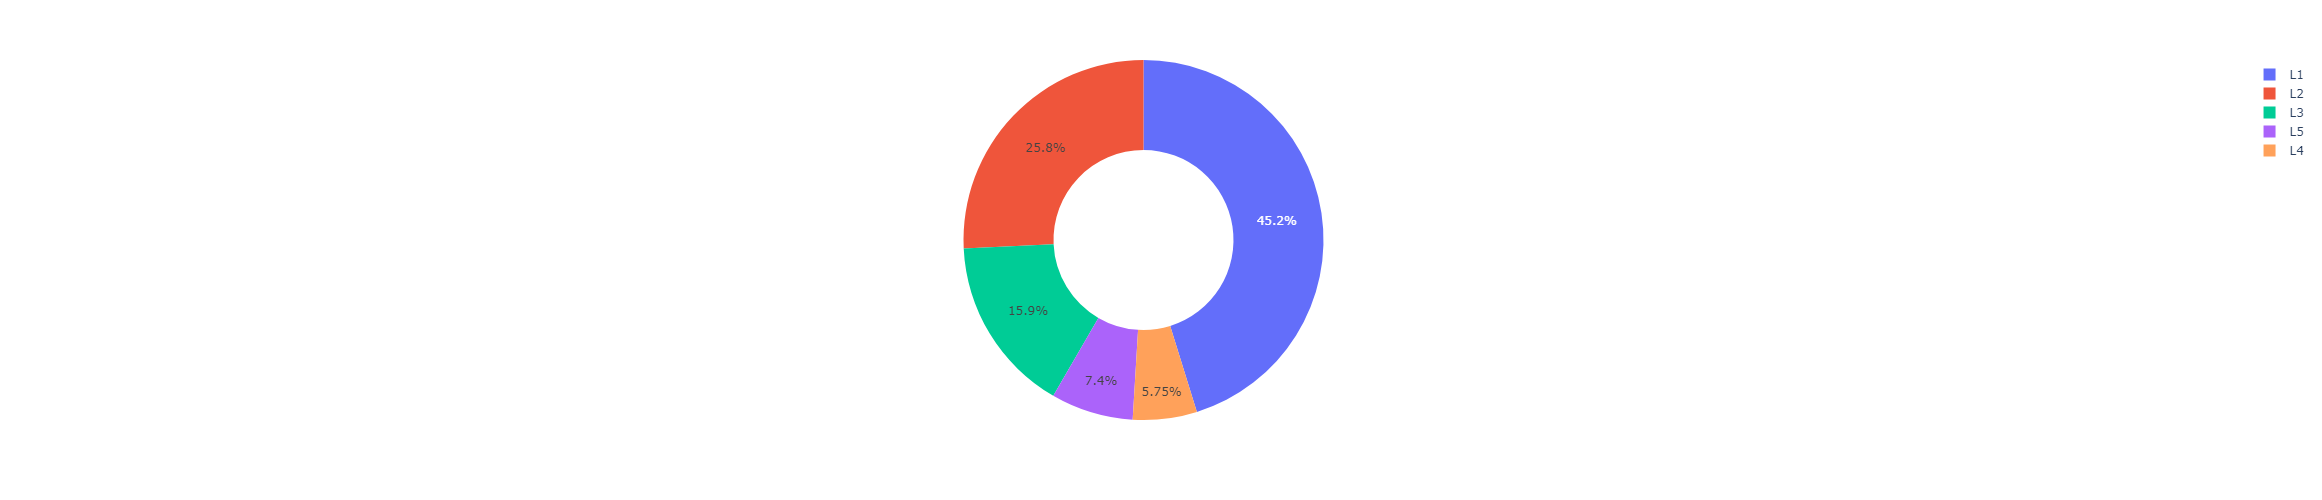

In [13]:
pie = data.Location_Type.value_counts()
fig = px.pie(data_frame=pie,
             values=pie.values,
             names=pie.index,
             width=500, height=500, hole=0.5)
fig.show()

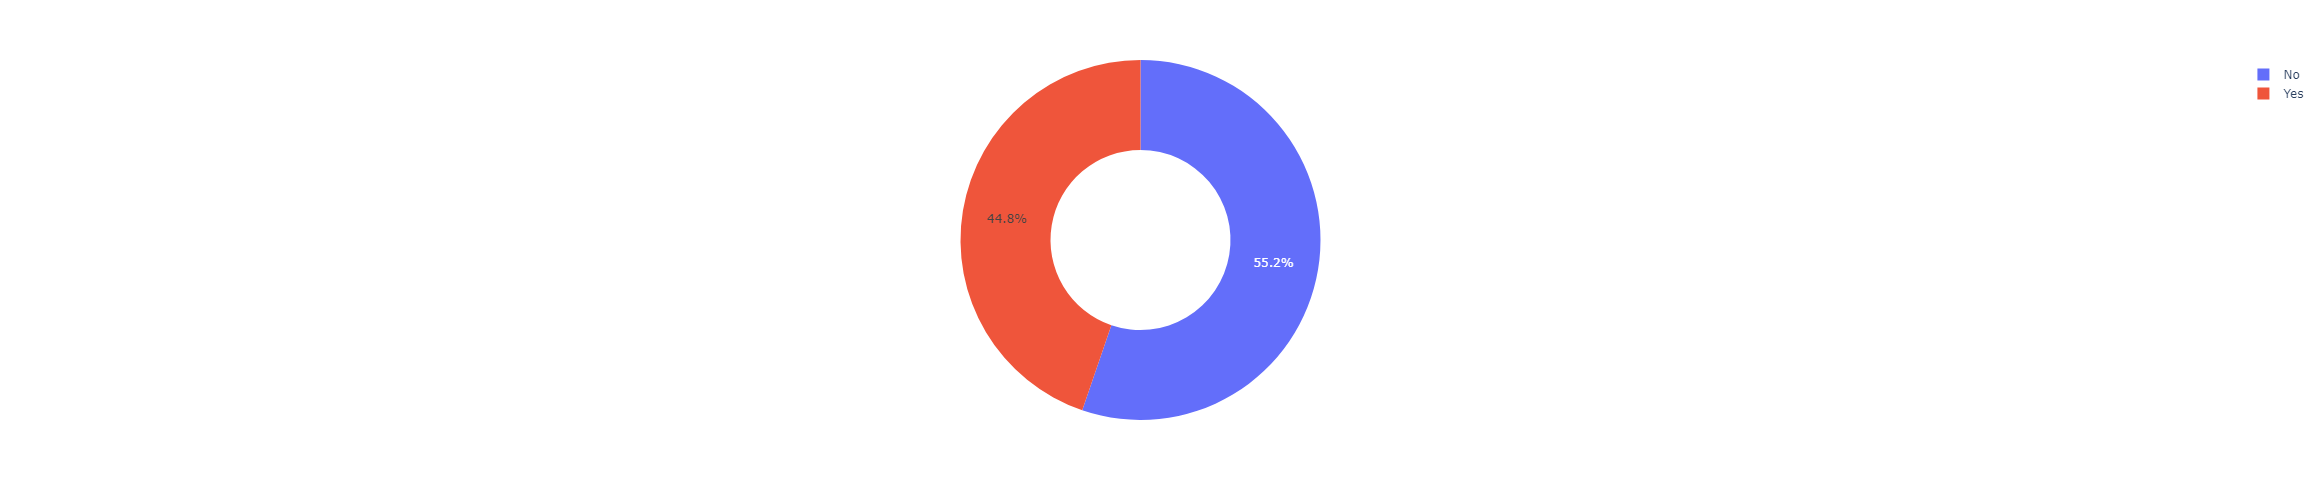

In [15]:
pie = data.Discount.value_counts()
fig = px.pie(data_frame=pie,
             values=pie.values,
             names=pie.index,
             width=500, height=500, hole=0.5)
fig.show()

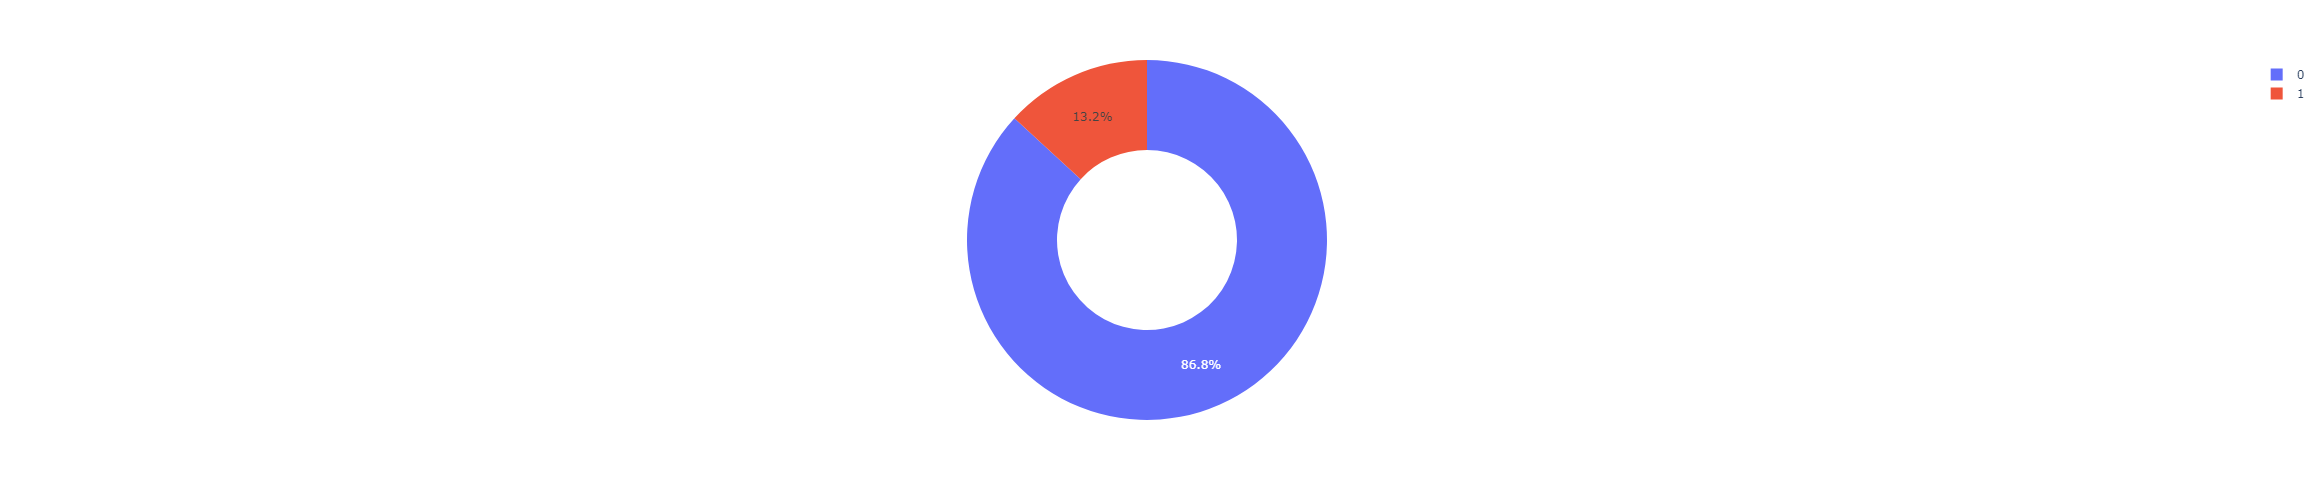

In [16]:
pie = data.Holiday.value_counts()
fig = px.pie(data_frame=pie,
             values=pie.values,
             names=pie.index,
             width=500, height=500, hole=.5)
fig.show()

## Number of Orders Prediction Model

In [18]:
data.Discount = data.Discount.map({"No": 0, "Yes": 1})
data.Store_Type = data.Store_Type.map({"S1": 1, "S2": 2, "S3": 3, "S4": 4})
data.Location_Type = data.Location_Type.map(dict((f"L{i}", i) for i in range(1, 6)))

In [19]:
data.tail()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
188335,T1188336,149,2,3,R2,2019-05-31,1,1,51,37272.00
188336,T1188337,153,4,2,R1,2019-05-31,1,0,90,54572.64
188337,T1188338,154,1,3,R2,2019-05-31,1,0,56,31624.56
188338,T1188339,155,3,1,R2,2019-05-31,1,1,70,49162.41
188339,T1188340,152,2,1,R1,2019-05-31,1,0,47,37977.00


In [21]:
data.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64

In [22]:
X = data[["Store_Type", "Location_Type", "Holiday", "Discount"]]
y = data["#Order"]

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [24]:
import lightgbm as ltb

In [25]:
model = ltb.LGBMRegressor()
model.fit(X_train, y_train)

LGBMRegressor()

In [26]:
pred = model.predict(X_test)

In [27]:
pd.DataFrame(data={"Predicted Orders": pred.flatten()})

,Predicted Orders
0,47.351897
1,97.068717
2,66.577788
3,85.143083
4,54.451098
...,...
37663,66.577788
37664,47.722874
37665,47.351897
37666,61.749386
